# Defining the aoi

In [1]:
import pandas as pd
import numpy as np
import xarray as xa
from pathlib import Path
import src.data.ecostress_io as eio
import rioxarray
import sys
import geopandas as gpd
import json

root_path = Path("/scratch/rave/")

with open(f"{root_path}/core/geo-countries/archive/countries.geojson", "rb") as f:
    all_countries_geojson = json.loads(f.read())


for i in all_countries_geojson['features']:
    if i['properties']['ADMIN'] == "France":
        france_geo = i


france_gdf = gpd.GeoDataFrame.from_features([france_geo]).explode()

france_gdf[france_gdf.area==max(france_gdf.area)].plot()

aoi = france_gdf[france_gdf.area==max(france_gdf.area)]

aoi_geojson = json.loads(aoi.to_json())

xmin, ymin, xmax, ymax = aoi.total_bounds
bounds_tuple = (4, 42, 7, 47)
xmin, ymin, xmax, ymax = bounds_tuple  # hardcoding since concattenating 1000s of ecostress files with different overlaps hangs

# Global rivers dataset

In [2]:
rivers_df = gpd.read_file(Path(root_path, "europe_rivers/eu_river.shp"))

rivers_df['R_ID'] = rivers_df['R_ID'].apply(int).apply(str)

france_rivers_df = rivers_df.cx[xmin:xmax, ymin:ymax]

### Check to make sure they overlay, geopandas has poor support for linestrings so we subset by the bounding box

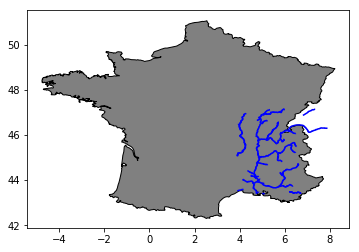

In [3]:
base = aoi.plot(color="grey", edgecolor="black")

france_rivers_df.plot(ax=base, color="blue")

## reading in paths and example data array

In [4]:
qa_path = Path(root_path, "rhone-ecostress-data", "ECO3ANCQA")
et_path = Path(root_path, "rhone-ecostress-data", "ECO3ETPTJPL")
esi_path = Path(root_path, "rhone-ecostress-data", "ECO4ESIPTJPL")

tif_qa_paths, csv_qa_paths, xml_qa_paths = eio.separate_extensions(qa_path)

tif_etdaily_paths, csv_et_paths, xml_et_paths = eio.separate_extensions(et_path, "*ETdaily*.tif")

et = eio.read_mask_ecostress_scene(tif_etdaily_paths[0])

reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018234105451_aid0001.tif


In [9]:

def read_and_clip_scenes(tif_paths, bounds_tuple):
    """
    Reads in multiple Landsat surface reflectance scenes given a regex pattern.
    Args:
        path (str): Path of form "../*".
    Returns:
        bool: Returns an xarray data array with dimensions for x, y, band, and time.
    """
    scenes = []
    for path in tif_paths:
        scene_da = eio.clip_box_scene(
                    eio.read_mask_ecostress_scene(path), bounds_tuple
                ) 
        if scene_da is not None:
            scenes.append(scene_da)
    return xa.concat(scenes, dim="date")

This finishes in about a minute! Still need to figure out one dimensional raster issue. and the coordinates get messed up...

In [10]:
all_et_daily = read_and_clip_scenes(tif_etdaily_paths, bounds_tuple)

all_et_daily.nbytes / 1e9

reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018234105451_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019041164230_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018249073345_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018242084859_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018241111830_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019160121806_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019062082625_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019168103316_aid0001.tif
The whol

reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019225141319_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018233132239_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019057092603_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018227134538_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018223135845_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019042110217_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019048135525_aid0001.tif
The whole scene falls

The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019208183106_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019052085434_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019216164733_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019279143434_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018242053633_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018236073456_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018222162908_aid0001.tif
The whole scene falls

The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018232092356_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019230114542_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019237091659_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019214182614_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019274152405_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019155162601_aid0001.tif
The whole scene falls outside the 

The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019168121043_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018215174226_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019185043458_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019054084734_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019172085103_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019223155305_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANS

reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018218164351_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018213192622_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019244051335_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019050090042_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019165143759_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019058101130_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019238065241_aid0001.tif
The whole scene falls

The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019170103007_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019217155756_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019043114653_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018239081123_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019051112314_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019163112722_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019028163418_aid0001.tif
reading ECO3ETPTJPL.0

The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018246083314_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019230100728_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019152154152_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019187043207_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019061091617_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018234123102_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019057075042_aid0001.tif
The whole scene falls

The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019060100753_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018245061134_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018225121440_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019217142100_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018240071802_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019217155848_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018216182701_aid0001.tif
The whole scene falls

reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018222145205_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019153180548_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018232141507_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019183075141_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019153162858_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018237081729_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019178053010_aid0001.tif
The whole scene falls

reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018212170556_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019223123738_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018233114719_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019041115354_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018223153732_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018226143713_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019159162322_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.0

The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018212170504_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018237113322_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019159130928_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018242102511_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019050135009_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019166121314_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019240051431_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018239112346_aid0001.tif
The whol

The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019185061205_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019048122006_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019175062205_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019040173314_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019158135716_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018232092540_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019168103224_aid0001.tif
The whole scene falls

The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019031153614_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018216164957_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019161161948_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019159130836_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019049095126_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019209174226_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019226132332_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.0

reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019048104354_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019164121529_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019227141048_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018226161324_aid0001.tif
The whole scene falls outside the aoi bounds, skipping and returning None
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019180052959_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018225170737_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019219173306_aid0001.tif
reading ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2019280134332_aid0001.tif
The whol

1581335.157375336

In [11]:
all_et_daily

<xarray.DataArray 'ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2018241111830_aid0001.tif' (date: 319, band: 1, y: 1143977, x: 1083318)>
dask.array<concatenate, shape=(319, 1, 1143977, 1083318), dtype=float32, chunksize=(1, 1, 1143977, 1083318)>
Coordinates:
    spatial_ref  int64 0
  * band         (band) int64 1
  * y            (y) float64 42.33 42.33 42.33 42.33 ... 47.0 47.0 47.0 47.0
  * x            (x) float64 4.0 4.0 4.0 4.0 4.0 4.0 ... 7.0 7.0 7.0 7.0 7.0 7.0
  * date         (date) datetime64[ns] 2018-08-29T11:18:30 ... 2019-09-29T17:00:05
Attributes:
    scales:         (1.0,)
    offsets:        (0.0,)
    add_offset:     0
    AREA_OR_POINT:  Area
    scale_factor:   1
    units:          W/m^2
    _FillValue:     -9999999999999.0
    grid_mapping:   spatial_ref

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib inline

ETcolors = ["#f6e8c3", "#d8b365", "#99974a", "#53792d", "#6bdfd2", "#1839c5"]
ETcmap = LinearSegmentedColormap.from_list("ET", ETcolors)
date_utc = pd.to_datetime(et['date'].values)
layer_type = et.attrs['filename'].split("_")[-3]
title = 'ECO3ETPTJPL Evapotranspiration'

fig = plt.figure(figsize=(9.7,7.6))                                                       # Set the figure size (x,y)
fig.suptitle(f'{title} ({layer_type}) \n at {date_utc}', fontsize=22)  # Add title for the plots
plt.axis('off')                                                                           # Remove axes from plot
im = plt.imshow(et.sel(band=1), cmap=ETcmap);                                                        # Plot array using colormap
# plt.scatter(Tcol, Trow, color="black", marker='x')                                        # Plot tower location
# Add a colormap legend
plt.colorbar(im, orientation='horizontal', fraction=0.05, pad=0.004, label=f"ET ({et.attrs['units']})", shrink=0.6).outline.set_visible(True)

In [ ]:
xa.open_rasterio(tif_qa_paths[0], parse_coordinates=True)

## Code graveyard

In [ ]:
def mask_NA_values():
    """
    Daily ET products have both nan values from where there are clouds 
    and -1e+13 for where the ecostress swath was clipped during the ordering process
    """
    masked_et = np.ma.masked_where(et.sel(band=1) == np.nan, et.sel(band=1))
    masked_et = np.ma.masked_where(masked_et == -1e+13, masked_et)